In [1]:
%matplotlib inline
import numpy as np
import scipy as sp
import matplotlib as mpl
import matplotlib.cm as cm
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
import pandas as pd
pd.set_option('display.width', 500)
pd.set_option('display.max_columns', 100)
pd.set_option('display.notebook_repr_html', True)
import seaborn as sns




# special matplotlib argument for improved plots
from matplotlib import rcParams
plt.rcParams['figure.figsize'] = (15, 10)
sns.set_style("whitegrid")
sns.set_context("poster")


In [2]:
from IPython.core.display import HTML
HTML("""
<style>
.output_png {
    display: table-cell;
    text-align: center;
    vertical-align: middle;
}
</style>
""")

In [3]:
### Imporitng libraries

# import and instantiate CountVectorizer (with the default parameters)
from sklearn.feature_extraction.text import CountVectorizer

In [4]:
df = pd.read_csv("data/train.csv")
df.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,22256635,"Nonsense? kiss off, geek. what I said is true...",1,0,0,0,0,0
1,27450690,"""\n\n Please do not vandalize pages, as you di...",0,0,0,0,0,0
2,54037174,"""\n\n """"Points of interest"""" \n\nI removed the...",0,0,0,0,0,0
3,77493077,Asking some his nationality is a Racial offenc...,0,0,0,0,0,0
4,79357270,The reader here is not going by my say so for ...,0,0,0,0,0,0


In [5]:
features = df[['comment_text','toxic']]
features.head(5)

,comment_text,toxic
0,"Nonsense? kiss off, geek. what I said is true...",1
1,"""\n\n Please do not vandalize pages, as you di...",0
2,"""\n\n """"Points of interest"""" \n\nI removed the...",0
3,Asking some his nationality is a Racial offenc...,0
4,The reader here is not going by my say so for ...,0


In [6]:
len(df.toxic)

95851

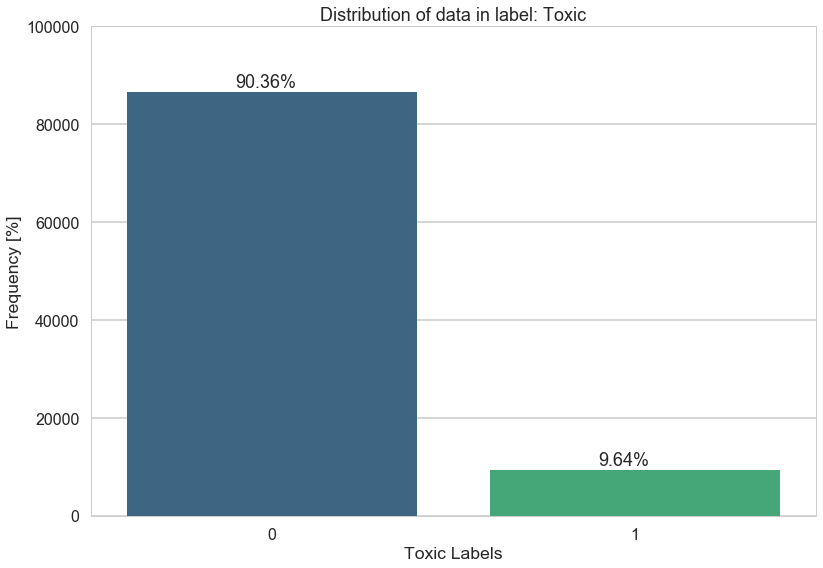

In [7]:
## Distribution of data point in each of these clusters obtained by k-means ++ 

ax = sns.countplot(x = df.toxic ,palette="viridis")
sns.set(font_scale=1.5)
ax.set_xlabel(' ')
ax.set_ylabel(' ')
fig = plt.gcf()
fig.set_size_inches(13,9)
ax.set_ylim(top=100000)
for p in ax.patches:
    ax.annotate('{:.2f}%'.format(100*p.get_height()/len(df.toxic)), (p.get_x()+ 0.3, p.get_height()+ 1000))

plt.title('Distribution of data in label: Toxic')
plt.xlabel('Toxic Labels')
plt.ylabel('Frequency [%]')
plt.show()

In [8]:
X = df.comment_text
y = df.toxic

In [9]:
# split X and y into training and testing sets
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)
print(100 *"_")
print(y_train.value_counts())
print(100 *"_")
print(y_test.value_counts())

(71888,)
(23963,)
(71888,)
(23963,)
____________________________________________________________________________________________________
0    64958
1     6930
Name: toxic, dtype: int64
____________________________________________________________________________________________________
0    21656
1     2307
Name: toxic, dtype: int64


/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [10]:
## Count vectorizer

vec = CountVectorizer()
X_train_vec  = vec.fit_transform(X_train)

In [11]:
# examine the document-term matrix
X_train_vec

<71888x117070 sparse matrix of type '<class 'numpy.int64'>'
	with 3126400 stored elements in Compressed Sparse Row format>

In [12]:

# transform testing data (using fitted vocabulary) into a document-term matrix
X_test_vec = vec.transform(X_test)
X_test_vec

<23963x117070 sparse matrix of type '<class 'numpy.int64'>'
	with 1025849 stored elements in Compressed Sparse Row format>

In [13]:
# import and instantiate a Multinomial Naive Bayes model
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()

In [14]:
# train the model using X_train_dtm (timing it with an IPython "magic command")
%time nb.fit(X_train_vec, y_train)

CPU times: user 50.7 ms, sys: 10.4 ms, total: 61.1 ms
Wall time: 60.1 ms


MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [15]:
# make class predictions for X_test_dtm
y_pred_class = nb.predict(X_test_vec)

In [16]:
# calculate accuracy of class predictions
from sklearn import metrics
metrics.accuracy_score(y_test, y_pred_class)

0.94750239953261273

In [17]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_class))

             precision    recall  f1-score   support

          0       0.96      0.99      0.97     21656
          1       0.82      0.59      0.68      2307

avg / total       0.94      0.95      0.94     23963



In [18]:
# print the confusion matrix
metrics.confusion_matrix(y_test, y_pred_class)

array([[21355,   301],
       [  957,  1350]])

In [19]:
# print message text for the false positives (Not Toxic incorrectly classified as Toxic)
print(len(X_test[y_test < y_pred_class]))
X_test[y_test < y_pred_class]

301


53725                            LULZ \n\nHAHAHAHAHAHA ==>
19327    Get a life Samaleks, go back to your skyscrape...
4339     Wow dude.  As your physician I suggest you sli...
39038    hey i like Jews hey i like Jews hey i like Jew...
77313                              Budgiekiller is a panzy
88927                     lalalalalala 5 4 3 2 1 blast off
48834    "\n\n Wah wah wah \nThe ""authority"" rises to...
39841                      ...lol! Smart, I say. Smart!! P
29592    You're giving Montevideo & architects a bad na...
58839                  Do ya! \nDo ya like spongebob? (  )
55108    "\nHilarious even without the en-dash thing: I...
4763     George Stephenson, an Englishman chose Swedish...
13220                   blah... blah... blah... blah......
15257    "\n\n?? Capitalism. What's wrong with the Cata...
19155                                . Also, I am a donkey
73283    "wow eric...btw dont you like hentai too?\n""e...
41921                         ..oh im sorry, you like hi

In [20]:
X_test[y_test > y_pred_class]

50717    BTW, I could'nt even save it until I deleted A...
92405    "\n\n 3RR warning \n\nThree times today (28 Oc...
46282    Er, what is the precise opposite of what the r...
18811    Yo who the heeck wrote this and how the heck d...
80943    "\n\n Getting rid of time stamps  \n\nSTOP MAK...
68681    DeCausa you are such an idiot. I was talking a...
25747    you are ignorant and a liar.  i'm impressed no...
62085    "\nWell, ""fuckhead"" seemed a little over the...
92557    THIS IS YOUR LAST WARNING \n\nYou will be bloc...
5975     well Alison - ur name and photo in ur user pag...
60574                            – \nDon't be stupid then!
771      What's your concept for uncivic?? you are one ...
7146     "\n\nMacedonian point of view\nWhy there is no...
1989      JUDENSCWEIN TO THE OVENS !  LIARS ! ALL OF YOU !
23067    fuck the police f\nXRAP ROCK LIT POP COUNTRY R...
45183    please remove this  massacres  bullshit .those...
3938     "\n\n Bye \n\nI'm not going to deal with the a.

In [21]:
X_test[77661]

"PLEASE, DO NOT ADD MORE UNCONFIRMED SERIES AND BLOCKS THAT HAVE NOT BEEN ANNOUNCED!!!1 \n\nPlease, it's the fucking true, i hate the people that lies, and doing vandalism, i'm not doing vandalism, i say the fucking true, but you are an idiots, do not add more series and movies, that have not been anounced in latin america, they don't appears on ANMTV, for that reason, they will never air in Latin America, the following series that i montioned are:\n The High Fructose Adventures of Annoying Orange\n Secret Fort for Awesome\n The Problem Solverz\n DC Nation\n DC Nation Shorts\n Incredible Crew\n\nPlease, it's the very true, sorry for bad words and expresions, but is the true, please, protect the article, greetings!!!"

In [22]:
# calculate predicted probabilities for X_test_dtm (poorly calibrated)
y_pred_prob = nb.predict_proba(X_test_vec)[:, 1]
y_pred_prob

array([  2.81992267e-002,   1.91737754e-040,   5.92833238e-002, ...,
         1.22811527e-139,   2.08389304e-030,   1.97910805e-019])

In [23]:
# calculate AUC
metrics.roc_auc_score(y_test, y_pred_prob)

0.8926194574293973

### Logistic Regression

In [24]:
# import and instantiate a logistic regression model
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [25]:
# train the model using X_train_dtm
%time logreg.fit(X_train_vec, y_train)

CPU times: user 12.2 s, sys: 207 ms, total: 12.4 s
Wall time: 12.8 s


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [26]:
# make class predictions for X_test_dtm
y_pred_class = logreg.predict(X_test_vec)

In [27]:
# calculate predicted probabilities for X_test_dtm (well calibrated)
y_pred_prob = logreg.predict_proba(X_test_vec)[:, 1]
y_pred_prob

array([  7.80250840e-02,   1.09720690e-04,   5.72517958e-02, ...,
         1.91926694e-13,   8.88867035e-03,   5.23020072e-01])

In [28]:
# calculate accuracy
metrics.accuracy_score(y_test, y_pred_class)

0.94645912448357883

In [29]:
# calculate AUC
metrics.roc_auc_score(y_test, y_pred_prob)

0.9564368510159007

In [30]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_class))

             precision    recall  f1-score   support

          0       0.95      0.99      0.97     21656
          1       0.88      0.51      0.65      2307

avg / total       0.94      0.95      0.94     23963



### Exploring toxic and not toxic words

In [31]:

# store the vocabulary of X_train
X_train_tokens = vec.get_feature_names()
len(X_train_tokens)

117070

In [32]:
# Naive Bayes counts the number of times each token appears in each class
nb.feature_count_

array([[ 349.,  870.,    5., ...,    1.,    1.,    1.],
       [  11.,   19.,    0., ...,    0.,    0.,    0.]])

In [33]:

# number of times each token appears across all Not toxic messages
Not_Toxic_token_count = nb.feature_count_[0, :]
Not_Toxic_token_count

array([ 349.,  870.,    5., ...,    1.,    1.,    1.])

In [34]:
# number of times each token appears across all Toxic messages
Toxic_token_count = nb.feature_count_[1, :]
Toxic_token_count

array([ 11.,  19.,   0., ...,   0.,   0.,   0.])

In [35]:
# create a DataFrame of tokens with their separate not toxic and toxic counts
tokens = pd.DataFrame({'token':X_train_tokens, 'Not_toxic':Not_Toxic_token_count, 'Toxic':Toxic_token_count}).set_index('token')
tokens.head()

,Not_toxic,Toxic
token,,
00,349.0,11.0
000,870.0,19.0
0000,5.0,0.0
000000,75.0,0.0
00000000,0.0,1.0


In [36]:
# examine 5 random DataFrame rows
tokens.sample(5, random_state=123)

,Not_toxic,Toxic
token,,
horse,110.0,28.0
radislav,1.0,0.0
livlehoods,1.0,0.0
mumtaz,5.0,0.0
rumination,3.0,0.0


In [37]:
# Naive Bayes counts the number of observations in each class
nb.class_count_

array([ 64958.,   6930.])

In [38]:
# add 1 to not toxic and toxic counts to avoid dividing by 0
tokens['Not_toxic'] = tokens.Not_toxic + 1
tokens['Toxic'] = tokens.Toxic + 1
tokens.sample(5, random_state=123)

,Not_toxic,Toxic
token,,
horse,111.0,29.0
radislav,2.0,1.0
livlehoods,2.0,1.0
mumtaz,6.0,1.0
rumination,4.0,1.0


In [39]:
# convert the ham and spam counts into frequencies
tokens['Not_toxic']  = tokens.Not_toxic  / nb.class_count_[0]
tokens['Toxic']  = tokens.Toxic / nb.class_count_[1]
tokens.sample(5, random_state=123)

,Not_toxic,Toxic
token,,
horse,0.001709,0.004185
radislav,0.000031,0.000144
livlehoods,0.000031,0.000144
mumtaz,0.000092,0.000144
rumination,0.000062,0.000144


In [40]:
# calculate the ratio of toxic to non-toxic for each token
tokens['spam_ratio'] = tokens.Toxic/ tokens.Not_toxic
tokens.sample(10, random_state=123)

,Not_toxic,Toxic,spam_ratio
token,,,
horse,0.001709,0.004185,2.448919
radislav,0.000031,0.000144,4.686724
livlehoods,0.000031,0.000144,4.686724
mumtaz,0.000092,0.000144,1.562241
rumination,0.000062,0.000144,2.343362
hurlock,0.000031,0.000144,4.686724
angelides,0.000031,0.000144,4.686724
pixelated,0.000077,0.000144,1.874690
καληνύχτα,0.000031,0.000144,4.686724


In [41]:
# examine the DataFrame sorted by spam_ratio
tokens.sort_values('spam_ratio', ascending=False)

,Not_toxic,Toxic,spam_ratio
token,,,
yourselfgo,0.000015,0.089755,5830.285137
offfuck,0.000015,0.052092,3383.815007
niggas,0.000015,0.049351,3205.719481
sexsex,0.000015,0.048052,3121.358442
cocksucker,0.000015,0.047763,3102.611544
mothjer,0.000015,0.044012,2858.901876
hanibal911you,0.000015,0.037374,2427.723232
cougar,0.000015,0.032323,2099.652525
ancestryfuck,0.000015,0.030159,1959.050794


### Using ngram: tuples of words toghther

In [42]:
vec = CountVectorizer(ngram_range=(1, 2))
X_train_vec  = vec.fit_transform(X_train)
X_train_vec
X_test_vec = vec.transform(X_test)
X_test_vec
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()
%time nb.fit(X_train_vec, y_train)
y_pred_class = nb.predict(X_test_vec)
metrics.accuracy_score(y_test, y_pred_class)

CPU times: user 194 ms, sys: 48 ms, total: 242 ms
Wall time: 242 ms


0.93615156699912361

In [43]:
metrics.confusion_matrix(y_test, y_pred_class)

array([[21587,    69],
       [ 1461,   846]])